<a href="https://colab.research.google.com/github/nabilpathan/nabil_analytics/blob/main/AirBnB_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AirBnB is a platform to rent home for travellers**


1.   I will figure out the trends shown factors area, rent, timeline in Paris in 2015.

*   For the same I will explore the data and make corrections wherever necessary
*   Prepare a visualization to understand the patterns
*   Provide an insight on whats happening

Import our data is the first step

In [18]:
import numpy as np
import pandas as pd
import chardet

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install chardet


In [21]:
df = pd.read_csv('/content/drive/MyDrive/AIRBNB/Airbnb Data/Listings.csv', encoding='ISO-8859-1')

<ipython-input-21-a800fea00978>:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/AIRBNB/Airbnb Data/Listings.csv', encoding='ISO-8859-1')


**Lets see how our Data looks like**

In [22]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


Lets use the info function to understand the datatype and columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

As we need to perform time seried analysis, the column values which are visible as dates but the data_type is object, we are changing it to data time data_type

In [24]:
df['host_since']=pd.to_datetime(df['host_since'])

In [25]:
df['host_since']

0        2011-12-03
1        2013-11-29
2        2014-07-31
3        2013-12-17
4        2014-12-14
            ...    
279707   2015-04-13
279708   2013-11-27
279709   2012-04-27
279710   2015-07-16
279711   2013-06-17
Name: host_since, Length: 279712, dtype: datetime64[ns]

from above, we can confirm that it is a data time format

In [48]:
paris_list = df.query("city=='Paris'").loc[:,['host_since','neighbourhood','city','accommodates','price']]

In [49]:
paris_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [50]:
paris_list.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


From below, we can see that the number of Null values are nigligible hence can be ignored and wont have a significant effect on our plots

In [51]:
paris_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [52]:
paris_list.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

From below, we can see that there are zeros in the date for accommodates and price, this is a quality issue of the data

In [53]:
paris_list.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


To figure out the depth of issue, lets explore and count the zeros

In [54]:
paris_list.query('accommodates==0')


,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
203261,2020-07-15,Batignolles-Monceau,Paris,0,0
203263,2016-06-07,Palais-Bourbon,Paris,0,0
203264,2020-09-08,Pantheon,Paris,0,0
203265,2020-09-21,Vaugirard,Paris,0,0
203267,2020-10-29,Observatoire,Paris,0,0


In [55]:
paris_list.query('accommodates==0').count()


host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [56]:
paris_list.query('price==0')


,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
...,...,...,...,...,...
208881,2020-10-22,Pantheon,Paris,0,0
208882,2020-11-26,Enclos-St-Laurent,Paris,0,0
208883,2020-11-26,Vaugirard,Paris,0,0
208884,2020-12-21,Vaugirard,Paris,0,0


In [57]:
paris_list.query('price==0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

**From above, it can be understood that zeros are negligible and hence can be ignored**

**Now to find out insights, we will need to plot data and to plot the data we need to prepare data specific databases. Doing the same below**

Preparing the database of Neighbourhood and average price

In [63]:
paris_list_neighbourhood=paris_list.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price', ascending=True)

In [67]:
paris_list_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


Preparing the database of Accommodation capacity and average price

In [87]:
paris_list_accommodates= (paris_list.query("neighbourhood=='Elysee'").groupby('accommodates').agg({'price':'mean'})).sort_values('price',ascending=True)

In [88]:
paris_list_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


**Preparing the database of average accommodation and average price with reference to years timeline**

In [98]:
paris_list_over_time=(
    paris_list.set_index('host_since')
    .resample("Y")
    .agg({
        'neighbourhood':'count',
        'price':'mean'
    })
)

In [99]:
paris_list_over_time.head()


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


Plotting the Neighbourhood and average price data

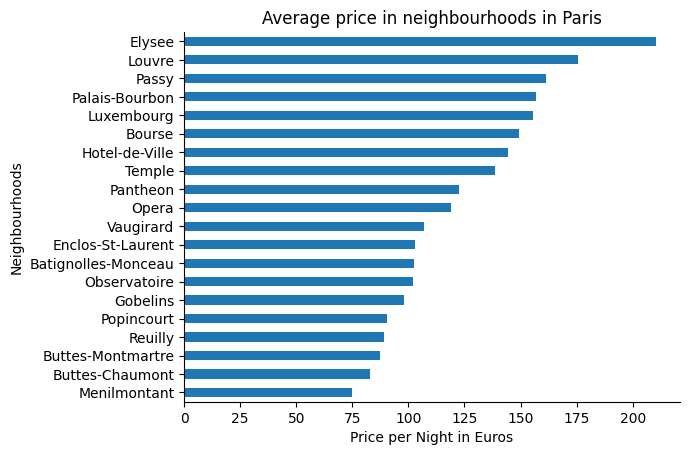

In [111]:
import seaborn as sns

(paris_list_neighbourhood
 .plot                                                      # Plots a graph
 .barh(                                                     # Bar graph
        title='Average price in neighbourhoods in Paris',   # Title
        xlabel="Price per Night in Euros",                  # x-axis label
        ylabel="Neighbourhoods",                            # y-axis label
        legend=None                                        # Disable legends

      )
 )

sns.despine() #removes borders


From, above we can see that the highest price is in Elysee and lowest in Menilmoutant

Plotting the graph between accommodation capacity and average price

<Axes: title={'center': 'Average price in accommodation in Paris'}, xlabel='Price per Night in Euros', ylabel='Accomodation capacity'>

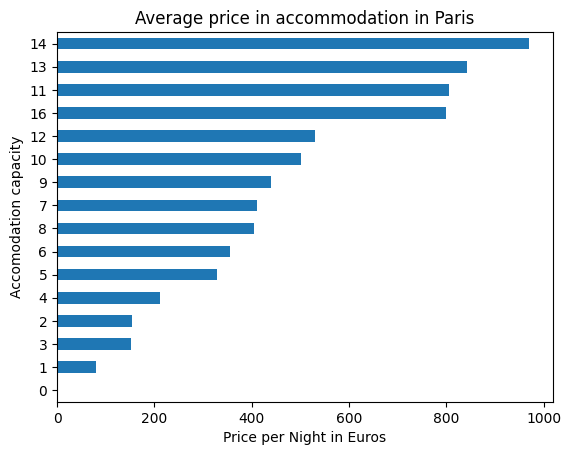

In [112]:
(paris_list_accommodates
 .plot                                                      # Plots a graph
 .barh(                                                     # Bar graph
        title='Average price in accommodation in Paris',   # Title
        xlabel="Price per Night in Euros",                  # x-axis label
        ylabel="Accomodation capacity",                            # y-axis label
        legend=None                                        # Disable legends

      )
 )


We are able to see a comparitive visualization of how price is increasing on increasing the accodation capacity.

`from which we are able to understand that `

*   Capacity 1 is the cheapest
*   Capacity 2 and 3 shares the same rate approx

From the steep raise in the prices it can be suggested that one can plan an affordable booking with capacity of 1 or 2,3 or 4 but not 5 as it have steep increase in rent.

For bigger groups, 8 capacity is beter than 7 as it offers same rate and can plan for capacity 11 rather than 14 as it has very steep increase.








**Plotting a twin chart now for comparisn**

<Axes: title={'center': 'New AirBnB hosts in paris over time'}, xlabel='host_since', ylabel='New Hosts'>

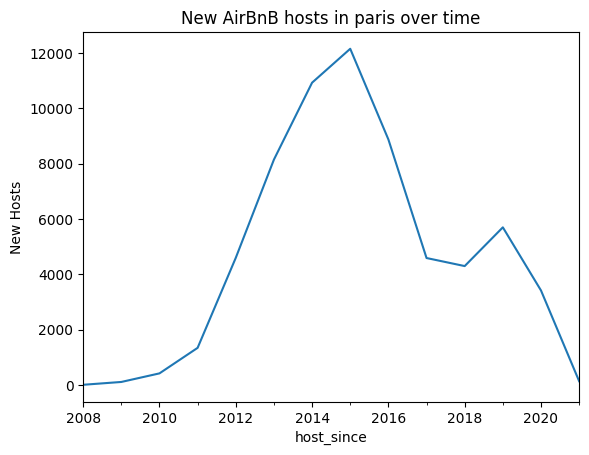

In [113]:
paris_list_over_time['neighbourhood'].plot(ylabel="New Hosts",title="New AirBnB hosts in paris over time")

<Axes: title={'center': 'Average price in Paris over time'}, xlabel='host_since', ylabel='New Hosts'>

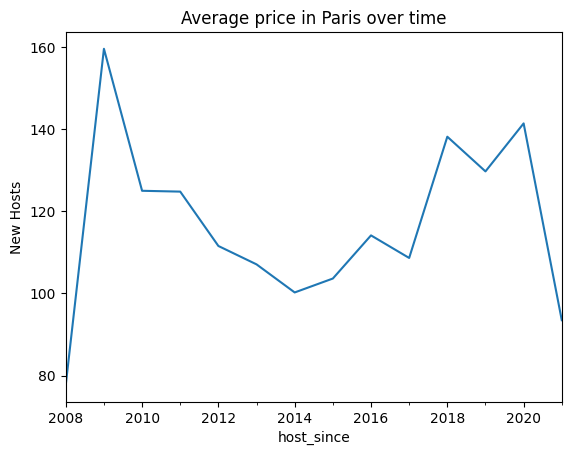

In [114]:
paris_list_over_time['price'].plot(ylabel="New Hosts",title="Average price in Paris over time")

**DUAL AXIS CHART**

Text(0.5, 1.0, '2015 regulations leaded to fewer new hosts, higher new prices')

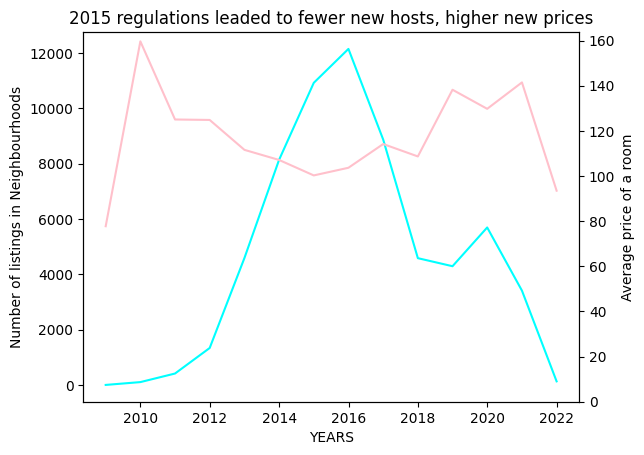

In [129]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(paris_list_over_time.index,paris_list_over_time['neighbourhood'],c="cyan")
ax.set_ylabel("Number of listings in Neighbourhoods")

ax2 = ax.twinx()

ax2.plot(paris_list_over_time.index,paris_list_over_time['price'],c="pink")
ax2.set_ylabel("Average price of a room")
ax2.set_ylim(0)

ax.set_xlabel("YEARS")

ax.set_title("2015 regulations leaded to fewer new hosts, higher new prices")

It can be observed from above that as the number of listings increase the prices dropped, similar to the demand and supple inversely proportional rule.

But at the threshold/peak of the total listings also the base price of 100 Euros was hardly broken

and since the new regulations were indroduced, the number of listings drastically reduced after 2016. But still from 12000 listings there was a drop significant decline of 5000 listings approx by the year 2019 still the prices only fluctuated 20% on the higher side